# 문제 정의 (카드사에서 알고 싶어하는 비밀은 뭘까.... 카드사의 마케팅 전략은 뭘까....)
1. 나이대 별로 카드 이용 고객의 특성은 어떨까?, 그리고 나이대에 맞는 카드 발급 전략은 뭘까?
2. 체크카드 사용자들을 대상으로 신용카드로 옮기게 하려면 어떤 전략을 취해야할까?
3. 신용한도를 늘려야될 대상들에게 푸쉬메세지를 보내고 싶은데.. 어떻게 보내야할까?
4. 카드를 비활성하는 이유는 뭘까..??




In [16]:
import pandas as pd
import matplotlib.pyplot as plt
!pip install koreanize-matplotlib
import koreanize_matplotlib
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')

sns.set_theme(style='whitegrid')
sns.set_palette("twilight")

credit_card = pd.read_csv('/content/drive/MyDrive/BankChurners.csv')

In [2]:
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [3]:
#수치형 데이터, 명목형 데이터로 나누기
credit_card_numerical = credit_card.dtypes[credit_card.dtypes!='object'].index.to_list()
credit_card_object = credit_card.dtypes[credit_card.dtypes=='object'].index.to_list()

print('Numerical Data types: ', len(credit_card_numerical))
print('Numerical Data types: ', len(credit_card_object))

Numerical Data types:  17
Numerical Data types:  6


# 데이터 특성 보기(간략하게)

In [17]:
credit_card.head()

credit_card = credit_card.rename(columns={'CLIENTNUM':'고객넘버',
                                          'Attrition_Flag':'이탈여부',
                                          'Customer_Age':'고객나이',
                                          'Gender':'성별',
                                          'Dependent_count':'부양가족수',
                                          'Education_Level':'학력',
                                          'Marital_Status':'결혼여부',
                                          'Income_Category':'소득유형',
                                          'Card_Category':'카드유형',
                                          'Months_on_book':'은행가입기간',
                                          'Total_Revolving_Bal':'전체리볼빙상환액',
                                          'Total_Relationship_Count':'보유은행상품수',
                                          'Months_Inactive_12_mon':'비활성개월수',
                                          'Contacts_Count_12_mon':'은행컨택횟수',
                                          'Credit_Limit':'신용한도',
                                          'Total_Trans_Amt':'총거래금액',
                                          'Avg_Utilization_Ratio':'평균카드사용률',
                                          'Avg_Open_To_Buy':'평균구매신용한도'
                                          }).drop(columns=['Total_Amt_Chng_Q4_Q1','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'])

In [5]:
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   고객넘버      10127 non-null  int64  
 1   이탈여부      10127 non-null  object 
 2   고객나이      10127 non-null  int64  
 3   성별        10127 non-null  object 
 4   부양가족수     10127 non-null  int64  
 5   학력        10127 non-null  object 
 6   결혼여부      10127 non-null  object 
 7   소득유형      10127 non-null  object 
 8   카드유형      10127 non-null  object 
 9   은행가입기간    10127 non-null  int64  
 10  보유은행상품수   10127 non-null  int64  
 11  비활성개월수    10127 non-null  int64  
 12  은행컨택횟수    10127 non-null  int64  
 13  신용한도      10127 non-null  float64
 14  전체리볼빙상환액  10127 non-null  int64  
 15  평균구매신용한도  10127 non-null  float64
 16  총거래금액     10127 non-null  int64  
 17  평균카드사용률   10127 non-null  float64
dtypes: float64(3), int64(9), object(6)
memory usage: 1.4+ MB


In [6]:
credit_card.head()

,고객넘버,이탈여부,고객나이,성별,부양가족수,학력,결혼여부,소득유형,카드유형,은행가입기간,보유은행상품수,비활성개월수,은행컨택횟수,신용한도,전체리볼빙상환액,평균구매신용한도,총거래금액,평균카드사용률
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1144,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1291,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,1887,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1171,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,816,0.000


<Axes: ylabel='나이대'>

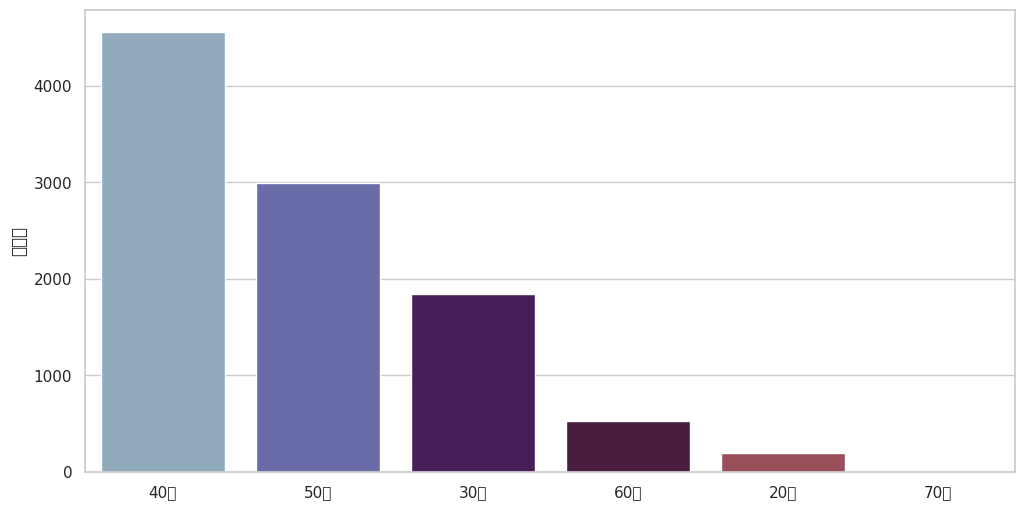

In [18]:
#고객 나이대 별 분류 카운트 수 (경제력이 있는 30>40>50>60대)
def make_groups(x):
  if x<30:
    return '20대'
  elif 30<=x<40:
    return '30대'
  elif 40<=x<50:
    return '40대'
  elif 50<=x<60:
    return '50대'
  elif 60<=x<70:
    return '60대'
  else:
    return '70대'

credit_card['나이대'] = credit_card['고객나이'].apply(make_groups)
age = credit_card['나이대'].value_counts().to_frame()
plt.figure(figsize=(12,6))
sns.barplot(data=age, x=age.index, y=age['나이대'])

In [8]:
#70대 이상은 2명 밖에 없기 때문에 제거
credit_card = credit_card[~(credit_card['나이대']=='70대')]

In [9]:
pd.set_option('float_format','{:.5f}'.format)
credit_card.describe()

,고객넘버,고객나이,부양가족수,은행가입기간,보유은행상품수,비활성개월수,은행컨택횟수,신용한도,전체리볼빙상환액,평균구매신용한도,총거래금액,평균카드사용률
count,10125.00000,10125.00000,10125.00000,10125.00000,10125.00000,10125.00000,10125.00000,10125.00000,10125.00000,10125.00000,10125.00000,10125.00000
mean,739175142.50370,46.32099,2.34667,35.92642,3.81254,2.34114,2.45531,8632.89621,1162.78499,7470.11122,4404.66074,0.27488
std,36903601.28824,8.00977,1.29862,7.98471,1.55450,1.01070,1.10631,9089.42287,815.06106,9091.31347,3397.21676,0.27571
min,708082083.00000,26.00000,0.00000,13.00000,1.00000,0.00000,0.00000,1438.30000,0.00000,3.00000,510.00000,0.00000
25%,713036208.00000,41.00000,1.00000,31.00000,3.00000,2.00000,2.00000,2555.00000,357.00000,1324.00000,2156.00000,0.02300
50%,717926358.00000,46.00000,2.00000,36.00000,4.00000,2.00000,2.00000,4549.00000,1276.00000,3475.00000,3900.00000,0.17500
75%,773140683.00000,52.00000,3.00000,40.00000,5.00000,3.00000,3.00000,11068.00000,1784.00000,9861.00000,4741.00000,0.50300
max,828343083.00000,68.00000,5.00000,56.00000,6.00000,6.00000,6.00000,34516.00000,2517.00000,34516.00000,18484.00000,0.99900


# 기초 EDA

1.고객 나이대 별 분류 카운트 수 (경제력이 있는 30>40>50>60대)

2.이탈여부 (사용 고객 > 이탈 고객)

3.성별 (여성>남성)

4.평균적인 카드 사용률은 어떻게 되는가? (70>20>60>30>50>40, 신용카드 보유 고객 나이대의 역순)

5.평균 은행가입기간은 어떻게 되는가? (70>20>60>30>50>40, 신용카드 보유 고객 나이대의 역순)

6.나이대에 따른 소득 유형

7.나이대에 따른 신용카드 이탈여부정도

8.나이대와 총 거래 금액

9.나이대와 신용한도

10.나이대에 따른 고객 수와 고객이탈 정도(%)


In [10]:
#고객 나이대 별 분류 카운트 수 (경제력이 있는 30>40>50>60대)
#이탈여부 (사용 고객 > 이탈 고객)
#성별 (여성>남성)
#평균적인 카드 사용률은 어떻게 되는가? (70>20>60>30>50>40, 신용카드 보유 고객 나이대의 역순)
#평균 은행가입기간은 어떻게 되는가? (70>20>60>30>50>40, 신용카드 보유 고객 나이대의 역순)


age = credit_card['나이대'].value_counts().to_frame()
card_exists = credit_card['이탈여부'].value_counts().to_frame()
gendercount = credit_card['성별'].value_counts().to_frame()
mean_used = credit_card.groupby('나이대')['평균카드사용률'].mean().sort_values().to_frame()
mean_bank = credit_card.groupby('나이대')['은행가입기간'].mean().sort_values(ascending=False).to_frame()
wage_age = credit_card.groupby('나이대')['소득유형'].value_counts().to_frame().rename(columns={'소득유형':'빈도'}).reset_index()
attriment = credit_card.groupby('나이대')['이탈여부'].value_counts().to_frame().rename(columns={'이탈여부':'빈도'})

<Axes: >

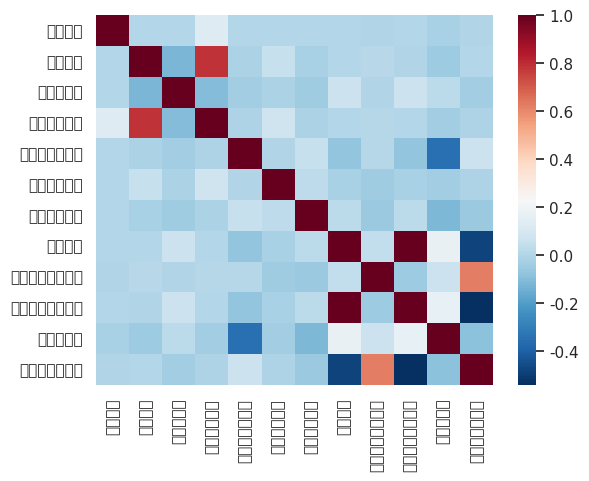

In [15]:
#상관관계 히트맵
corelation = credit_card.corr()
sns.heatmap(corelation,fmt='g', cmap='RdBu_r', cbar=True)

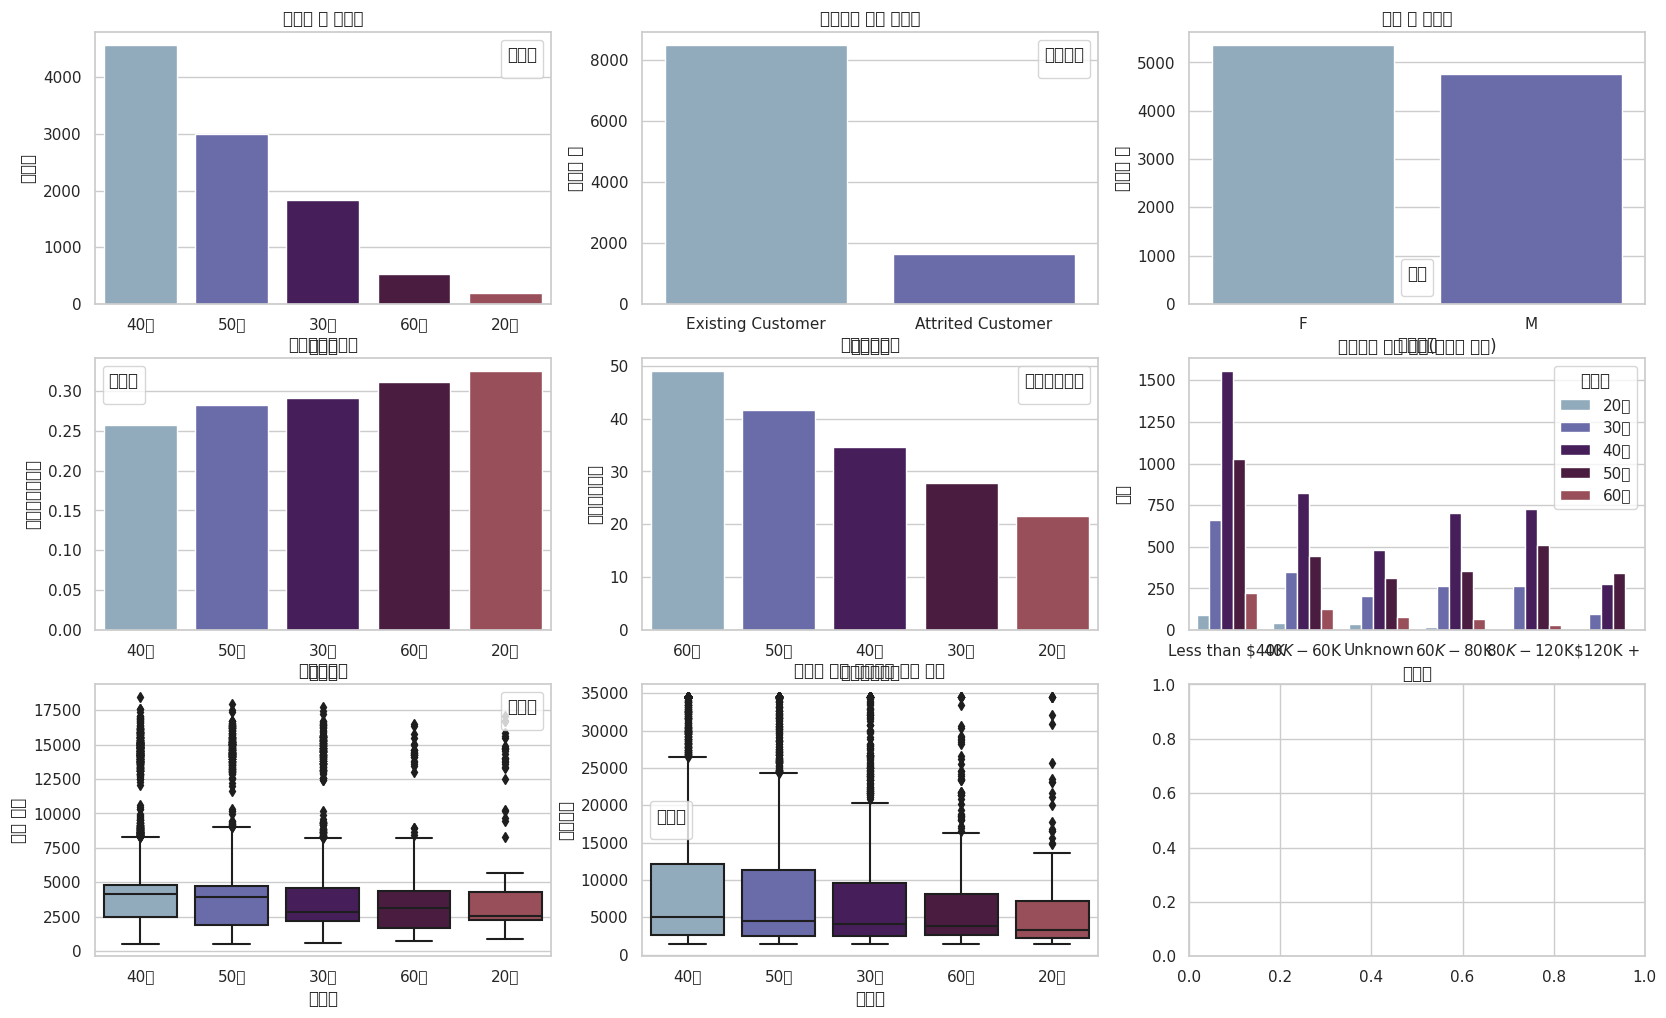

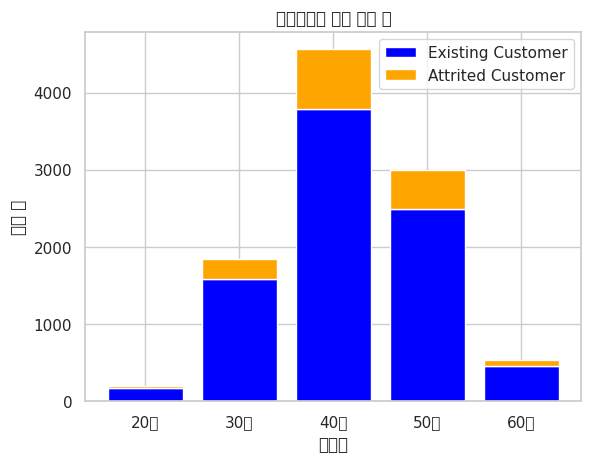

In [12]:
#객체 지향 방식의 코드 (배경을 먼저 설정해놓고 간다, AXS는 데이터가 포함되는 공간을 의미함, ncol은 열을 몇개로 할 것인가?)
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(20, 12))

# 첫 번째 서브플롯
ax1 = axs[0][0]
sns.barplot(data=age, x=age.index, y=age['나이대'].values, ax=ax1)
ax1.set_title('연령대 별 카운트')
ax1.set_xlabel('연령대')
ax1.set_ylabel('카운트')
ax1.legend(title='연령층')

# 두 번째 서브플롯
ax2 = axs[0][1]
sns.barplot(data=card_exists, x=card_exists['이탈여부'].index, y=card_exists['이탈여부'].values, ax=ax2)
ax2.set_title('이탈여부 고객 연령층')
ax2.set_xlabel('이탈여부')
ax2.set_ylabel('카운트 수')
ax2.legend(title='이용여부')

# 세 번째 서브플롯
ax3 = axs[0][2]
sns.barplot(data=gendercount, x=gendercount['성별'].index, y=gendercount['성별'].values, ax=ax3)
ax3.set_title('성별 별 카운트')
ax3.set_xlabel('신용카드 보유 여부(이탈자 포함)')
ax3.set_ylabel('카운트 수')
ax3.legend(title='성별')

# 네 번째 서브플롯
ax4 = axs[1][0]
sns.barplot(data=mean_used, x=mean_used['평균카드사용률'].index, y=mean_used['평균카드사용률'].values, ax=ax4)
ax4.set_title('평균카드사용률')
ax4.set_xlabel('연령대')
ax4.set_ylabel('평균카드사용률')
ax4.legend(title='연령대')

# 다섯번째 서브플롯
ax5 = axs[1][1]
sns.barplot(data=mean_bank,x=mean_bank['은행가입기간'].index, y=mean_bank['은행가입기간'].values, ax=ax5)
ax5.set_title('은행가입기간')
ax5.set_xlabel('은행가입기간')
ax5.set_ylabel('은행가입기간')
ax5.legend(title='은행가입기간')

# 여섯번째 서브플롯
ax6 = axs[1][2]
sns.barplot(data=wage_age,x='소득유형', y='빈도',hue='나이대', ax=ax6)
ax6.set_title('소득분위')
ax6.set_xlabel('연령대')
ax6.set_ylabel('빈도')
ax6.legend(title='연령대')

# 일곱번째 서브플롯
ax7 = axs[2][0]
sns.boxplot(data=credit_card,x='나이대', y='총거래금액', ax=ax7)
ax7.set_title('총거래금액')
ax7.set_xlabel('연령대')
ax7.set_ylabel('사용 금액')
ax7.legend(title='연령대')


# 여덟번째 서브플롯
ax8 = axs[2][1]
sns.boxplot(data=credit_card,x='나이대', y='신용한도', ax=ax8)
ax8.set_title('연령대 따른 신용한도 박스 플롯')
ax8.set_xlabel('연령대')
ax8.set_ylabel('신용한도')
ax8.legend(title='연령대')

# 이탈여부 데이터
ages = ['20대', '30대', '40대', '50대', '60대']
existing_customers = [178, 1580, 3789, 2492, 459]
attrited_customers = [17, 261, 772, 506, 71]

# 누적막대그래프 생성
fig, ax = plt.subplots()
ax.bar(ages, existing_customers, label='Existing Customer', color='blue')
ax.bar(ages, attrited_customers, bottom=existing_customers, label='Attrited Customer', color='orange')

# 그래프에 레이블 추가
ax.set_xlabel('나이대')
ax.set_ylabel('고객 수')
ax.set_title('이탈여부에 따른 고객 수')

# 범례 추가
ax.legend()

# 그래프 표시
plt.show()

In [13]:
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10125 entries, 0 to 10126
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   고객넘버      10125 non-null  int64  
 1   이탈여부      10125 non-null  object 
 2   고객나이      10125 non-null  int64  
 3   성별        10125 non-null  object 
 4   부양가족수     10125 non-null  int64  
 5   학력        10125 non-null  object 
 6   결혼여부      10125 non-null  object 
 7   소득유형      10125 non-null  object 
 8   카드유형      10125 non-null  object 
 9   은행가입기간    10125 non-null  int64  
 10  보유은행상품수   10125 non-null  int64  
 11  비활성개월수    10125 non-null  int64  
 12  은행컨택횟수    10125 non-null  int64  
 13  신용한도      10125 non-null  float64
 14  전체리볼빙상환액  10125 non-null  int64  
 15  평균구매신용한도  10125 non-null  float64
 16  총거래금액     10125 non-null  int64  
 17  평균카드사용률   10125 non-null  float64
 18  나이대       10125 non-null  object 
dtypes: float64(3), int64(9), object(7)
memory usage: 1.5+ MB


# 1. 연령대 별로 카드 이용 고객의 특성은 어떨까?
그리고 연령대에 맞는 카드 발급 전략은 무엇일까?

In [20]:
#연령대 별 데이터 생성
credit_20g = credit_card[(credit_card['고객나이']>=20) & (credit_card['고객나이']<30)]
credit_30g = credit_card[(credit_card['고객나이']>=30) & (credit_card['고객나이']<40)]
credit_40g = credit_card[(credit_card['고객나이']>=40) & (credit_card['고객나이']<50)]
credit_50g = credit_card[(credit_card['고객나이']>=50) & (credit_card['고객나이']<60)]
credit_60g = credit_card[(credit_card['고객나이']>=60) & (credit_card['고객나이']<70)]

In [23]:
#학력에 따라 평균 신용한도 차이가 있나?
#언에듀가 왜케 신용이 높아
print(credit_20g.groupby('학력')['신용한도'].mean().sort_values())

학력
High School     4982.77073
College         5035.15600
Graduate        6312.75849
Unknown         6880.36364
Post-Graduate   6980.66471
Uneducated      7721.38077
Name: 신용한도, dtype: float64

In [ ]:
#boxplot을 보니, uneducated인 사람들의 중위수는 3000에 수렴하고 있으나, 자금이 많은 몇명의 사람들이 평균 신용한도를 높이고 있음을 알 수 있음. unedu가 몇 명 있지도 않음.
plt.boxplot(credit_20g.loc[credit_20g['학력']=='Uneducated','신용한도'])